# Predictive Modelling mit ARIMA 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel("kijangemas_quelle.xlsx")
df

,Date,1 oz Sell,1 oz Buy,1/2 oz Sell,1/2 oz Buy,1/4 oz Sell,1/4 oz Buy
0,2018-01-03,5632.0,5415.0,2869.0,2708.0,1461.0,1354.0
1,2018-01-04,5579.0,5362.0,2842.0,2681.0,1447.0,1341.0
2,2018-01-05,5608.0,5391.0,2857.0,2696.0,1455.0,1348.0
3,2018-01-08,5585.0,5371.0,2845.0,2685.0,1449.0,1343.0
4,2018-01-09,5592.0,5377.0,2849.0,2688.0,1451.0,1344.0
...,...,...,...,...,...,...,...
684,2020-10-23,8372.0,8047.0,4265.0,4023.0,2172.0,2012.0
685,2020-10-26,8386.0,8044.0,4272.0,4022.0,2176.0,2011.0
686,2020-10-27,8413.0,8086.0,4286.0,4043.0,2183.0,2021.0
687,2020-10-28,8424.0,8087.0,4292.0,4043.0,2186.0,2022.0


In [3]:
timestamp, selling = [], []  
timestamp = pd.DatetimeIndex(df['Date']).date
selling = df["1 oz Sell"]
dfges = pd.DataFrame({'timestamp': timestamp, 'selling': selling})
dfges

,timestamp,selling
0,2018-01-03,5632.0
1,2018-01-04,5579.0
2,2018-01-05,5608.0
3,2018-01-08,5585.0
4,2018-01-09,5592.0
...,...,...
684,2020-10-23,8372.0
685,2020-10-26,8386.0
686,2020-10-27,8413.0
687,2020-10-28,8424.0


In [4]:
df3 = dfges.set_index('timestamp')
df3.head()

,selling
timestamp,
2018-01-03,5632.0
2018-01-04,5579.0
2018-01-05,5608.0
2018-01-08,5585.0
2018-01-09,5592.0


In [5]:
from statsmodels.tsa.stattools import adfuller

def ADF_Test(time_series):
    result = adfuller(time_series, autolag = 'AIC')
    print('\033[01m' + '\033[04m' + 'Augmented Dicky-Fuller Test' + '\033[0m')
    labels = ['ADF Test Statistics', 'p-value', '# Lags used', '# Observations used']
    
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
   
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.4f' % (key, value))
        
    if result[1] <= 0.05:
        print('\033[01m' + '\033[91m' + 'Reject the null hypothesis!' + '\033[0m')
        print('Data has no unit root and the time series is stationary.')
    else:
        print('\033[01m' + '\033[91m' + "Fail to reject the null hypothesis!" + '\033[0m')
        print('Data has a unit root and the time series is non-stationary.')

# Autoregressive Integrated Moving Average Model (ARIMA)

Zur Parametrisierung von ARIMA werden $p, d, q$ verwendet, wobei
* <b>$p$ ist der Autoregressive Teil (AR) des Modells.</b> Es ermöglicht uns, den Effekt vergangener Werte in unser Modell einzubeziehen. Intuitiv ähnelt dies der Aussage, dass es morgen wahrscheinlich warm sein wird, wenn es heute warm ist.
* <b>$q$ ist der Moving Average Teil (MA) bzw. der gleitende Durchschnittsteil des Modells.</b> Dies ermöglicht es uns, den Fehler unseres Modells als lineare Kombination der Fehlerwerte festzulegen, die zu früheren Zeitpunkten in der Vergangenheit beobachtet wurden.
* <b>$d$ ist der integrierte Teil (I) des Modells.</b> Dies schließt Terme in das Modell ein, die das Ausmaß der Differenzierung (d.h. die Anzahl vergangener Zeitpunkte, die vom aktuellen Wert subtrahiert werden sollen) enthalten, um auf die Zeitreihen anzuwenden. Intuitiv wäre dies ähnlich wie die Aussage, dass es morgen wahrscheinlich dieselbe Temperatur sein wird, wenn der Temperaturunterschied in den letzten drei Tagen sehr gering war.

Ein stochastischer Prozess wird als ARIMA($p,d,q$)-Prozess definiert, wenn dessen Differenz der Ordnung $d$ ein stationärer ARMA($p,q$)-Prozess von der Form
\begin{align*}
X_t=\varphi_0+\sum_{i=1}^{p}\varphi_iX_{t-i}+\varepsilon_t+\sum_{i=1}^{q}\theta_i\varepsilon_{t-i}
\end{align*}
ist. 

<b>Die Hauptschritte bei der Modellanpassung eines ARIMA-Modells:</b>

<b>1) Modellidentifizierung</b> 
* Ziel der Identifikation ist es, die Spezifikationsparameter $d$, $p$ und $q$ zu bestimmen
* $d$ ist die Anzahl der notwendigen Differenzierungen, um die Zeitreihe stationär zu machen. Zur Bestimmung von $d$ können Einheitswurzeltests (z.B. Dickey-Fuller-Test) verwendet werden 
* Für die Ordnungen $p$ und $q$ werden häufig die Autokorrelationsfunktion (ACF) und die partielle Autokorrelationsfunktion (PACF) herangezogen sowie Kriterien zur Modellselektion, wie das Akaike-Informationskriterium (AIC) oder das Bayessche Informationskriterium (BIC)

<b>2) Parameterschätzung</b>
* Ermitteln von Koeffizienten des Regressionsmodells unter Verwendung von Anpassungsverfahren
* Maximum-Likelihood-Methode 
* Kleinste-Quadrate-Methode

<b>3) Modellüberprüfung</b>
* Residuen des angepassten Modells berechnen
* Überprüfen, ob die Residuen unabhängig und identisch verteilt sind mit Erwartungswert Null und Varianz $\sigma^2$ wie White Noise
* Überprüfung der Signifikanz einzelner Parameter

In der Regel muss man diese drei Schritte bei einer gegebenen Zeitreihe mehrmals wiederholen, bevor ein geeignetes Modell gefunden ist.

<b>Zur Erinnerung: Autokorrelationsfunktion (ACF) und partielle Autokorrelationsfunktion (PACF)</b>

<b>Autokorrelationsfunktion (ACF)</b>: $\rho(\tau)=\frac{\gamma(\tau)}{\gamma(0)}=\frac{Cov(X_t,X_{t+\tau})}{Var(X_t)}; \tau\in\mathbb{Z}$

Das ist der Korrelationskoeffizient zwischen den Zufallsvariablen $X_t$ und $X_{t+\tau}$, der wegen der Stationarität nicht von $t$, wohl aber von der Zeitdifferenz $\tau$ abhängen kann. $\rho(\tau)$ ist somit ein Maß für die lineare Abhängigkeit zwischen zwei Prozessvariablen, die um $\tau$ Zeiteinheiten auseinander liegen. In diesem Zusammenhang wird $\tau$ auch als <b>Lag</b> bezeichnet.

Eine wichtige Anwendung der ACF ist die folgende: Man unterstellt, dass der charakteristische Verlauf der empirischen ACF auch der der theoretischen ACF ist, und kann so auf den Typ des zugrundeliegenden stationären stochastischen Prozesses schließen. Wenn man sich jedoch speziell für die Ordnung eines linearen autoregressiven Prozesses interessiert, ist die partielle Autokorrelationsfunktion besser geeignet.


<b>Partielle Autokorrelationsfunktion (PACF)</b>: 
$\pi(\tau) = 
\begin{cases}
\varphi_{\tau,\tau} & \tau=1,2,\dots \\
0 & \tau=0\\
\pi(-\tau) & \tau=-1,-2,\dots
\end{cases}$

Diese Funktion an der Stelle $\tau$ gibt den partiellen Korrelationskoeffizienten zwischen zwei Prozessvariablen, die $\tau$ Zeiteinheiten auseinander liegen, unter Ausschluss des Einflusses der zeitlich dazwischen liegenden Prozessvariablen wieder. Dieser Koeffizient ist ein Maß für den linearen Zusammenhang zwischen $X_t$ und $X_{t+\tau}$ unter Ausschaltung des linearen Einflusses von $X_{t+1}, \dots, X_{t+\tau-1}$. Dadurch wird eine durch die Zwischenvariablen erzeugte Scheinkorrelation beseitigt.

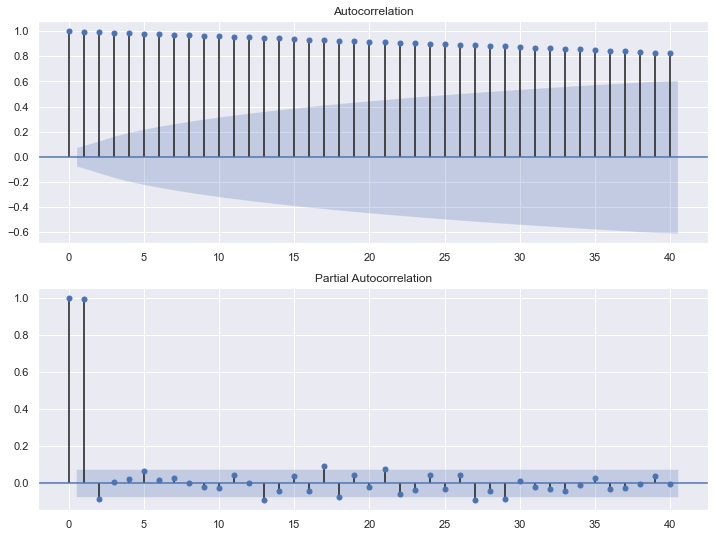

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize = (12, 9))
ax1 = fig.add_subplot(211)
fig = plot_acf(df3['selling'], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df3['selling'], lags = 40, ax = ax2)

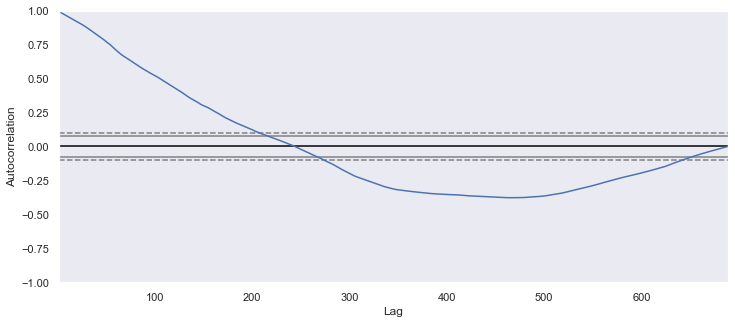

In [7]:
from pandas.plotting import autocorrelation_plot
fig = plt.figure(figsize = (12, 5))
autocorrelation_plot(df3['selling'])
plt.show()

<b>Steckbrief zur Identifizierung von AR-, MA- und ARMA-Prozessen:</b>

<b>Reiner AR($p$)-Prozess</b>
* ACF $\rho(\tau)$ klingt mit wachsendem $\tau$ ab, eventuell sinusförmig oder alternierend
* PACF $\pi(\tau)$ bricht ab mit $\tau>p$

<b>Reiner MA($q$)-Prozess</b>
* ACF $\rho(\tau)$ bricht ab mit $\tau>q$
* PACF $\pi(\tau)$ klingt mit wachsendem $\tau$ ab, eventuell sinusförmig oder alternierend

<b>ARMA($p,q$)-Prozess</b>
* Beide Funktionen $\rho(\tau)$ und $\pi(\tau)$ klingen mit wachsendem $\tau$ ab, eventuell sinusförmig oder alternierend

Mit Hilfe der Funktion <b>auto_arima()</b> aus dem Modul <b>pmdarima</b> können sich die Parameter $p, d, q$ "automatisch" identifizieren lassen. Diese einfache Methode dient nur als erste Orientierung, da dies oft kein gutes Ergebnis für nicht-triviale Zeitreihen liefert.

<b>pmdarima</b> (für py + arima) ist eine statistische Bibliothek, die entwickelt wurde, um die Lücke in den Pythons Zeitreihenanalysefunktionen zu füllen. Dies entspricht etwa Rs auto.arima.

In [8]:
train_selling = dfges['selling'][0:628]
test_selling = dfges['selling'][628:689]

from pmdarima import auto_arima
stepwise_model = auto_arima(train_selling, start_p = 1, start_q = 1, max_p = 7, max_q = 7, d = None, 
                            seasonal = False, trace = True, stepwise = True, 
                            error_action = 'ignore', suppress_warnings = True)

print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=7309.969, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=7138.102, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7307.971, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=7078.965, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=7055.104, Time=0.15 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=7041.567, Time=0.16 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=7025.651, Time=0.23 sec
 ARIMA(6,2,0)(0,0,0)[0] intercept   : AIC=7006.845, Time=0.68 sec
 ARIMA(7,2,0)(0,0,0)[0] intercept   : AIC=6993.545, Time=0.92 sec
 ARIMA(7,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(6,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(7,2,0)(0,0,0)[0]             : AIC=6991.590, Time=0.40 sec
 ARIMA(6,2,0)(0,0,0)[0]             : AIC=7004.879, T

Laut auto_arima() ist ARIMA (6, 2, 1) die optimale Auswahl für unseren Datensatz. Nun prognostizieren wir sowohl die Werte als auch das Konfindenzintervall für die nächsten 61 Tage:

In [9]:
forecast, conf_int = stepwise_model.predict(n_periods = 61, return_conf_int = True)
forecast = pd.DataFrame(forecast, columns = ['Predicted'])
df_conf = pd.DataFrame(conf_int, columns = ['Upper bound', 'Lower bound'])
df_conf["Index"] = range(628, 689)
df_conf = df_conf.set_index("Index")
forecast["Index"] = range(628, 689)
forecast = forecast.set_index("Index")

Schließlich lassen sich die Ergebnisse mit Konfidenzschranken grafisch darstellen:

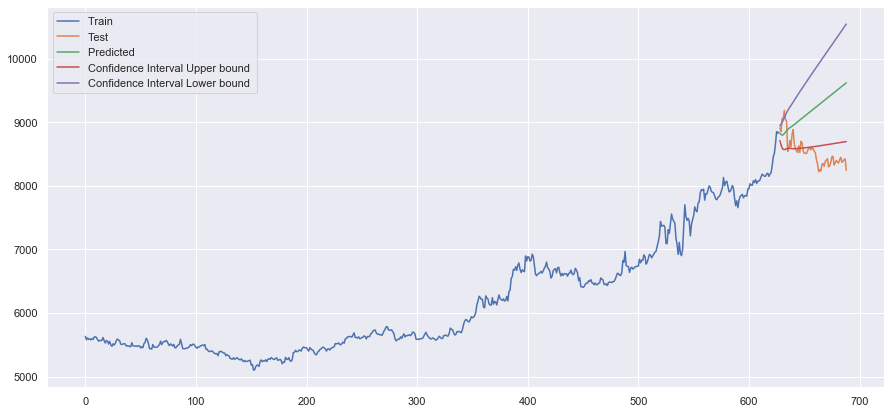

In [10]:
fig = plt.figure(figsize = (15, 7))
plt.plot(train_selling, label = 'Train ')
plt.plot(test_selling, label = 'Test ')
plt.plot(forecast, label = 'Predicted ')
plt.plot(df_conf['Upper bound'], label = 'Confidence Interval Upper bound ')
plt.plot(df_conf['Lower bound'], label = 'Confidence Interval Lower bound ')
plt.legend(loc = 'best')
plt.show()

## SARIMA = Seasonal ARIMA

SARIMA ist eine Technik von ARIMA, bei der die saisonale Komponente in univariaten Zeitreihendaten behandelt werden kann. Es werden drei neue Hyperparameter hinzugefügt, um AR($P$), I($D$) und MA($Q$) für die Saisonalitätskomponente einer Zeitreihe festzulegen. Das SARIMA-Modell kombiniert sowohl nicht saisonale als auch saisonale Komponenten in einem multiplikativen Modell, welches mit <b>ARIMA$(p, d, q)$x$(P, D, Q)_s$</b> bezeichnet wird.
* <b>$(p, d, q)$</b> sind die oben beschriebenen nicht-saisonalen Parameter
* <b>$(P, D, Q)$</b> folgen der gleichen Definition, werden jedoch auf die saisonale Komponente der Zeitreihe angewendet
* <b>$s$</b> ist die Periodizität der Zeitreihe (1 $\hat{=}$ jährlich (nicht-saisonal); 4 $\hat{=}$ vierteljährlich; 12 $\hat{=}$ monatlich; 52 $\hat{=}$ wöchentlich usw.)

Das SARIMAX-Modell <b>ARIMA$(p, d, q)$x$(P, D, Q)_s(X)$</b> ist ein SARIMA-Modell mit externen Einflussvariablen, wobei $X$ der Vektor exogener Variablen ist.

Bei der Anpassung von Zeitreihendaten an ein saisonales ARIMA-Modell besteht unser erstes Ziel darin, die Werte von ARIMA$(p, d, q)$x$(P, D, Q)_s$ zu ermitteln. Die korrekte Parametrisierung von ARIMA-Modellen kann jedoch ein mühsamer manueller Prozess sein, der Fachwissen und Zeit erfordert.

Wir werden im Folgenden eine <b>"Rastersuche"</b> (grid search) verwenden, um verschiedene Parameterkombinationen iterativ zu untersuchen. Für jede Kombination von Parametern passen wir ein neues Seasonal ARIMA-Modell mit der <b>SARIMAX()</b>-Funktion aus dem Modul <b>statsmodels</b> an und bewerten dessen Gesamtqualität. Sobald wir die gesamte Parameterlandschaft untersucht haben, wird unser optimaler Parametersatz derjenige sein, der die beste Leistung für unsere Kriterien liefert. Beginnen wir mit der Generierung der verschiedenen Parameterkombinationen, die wir bewerten möchten:

In [11]:
from itertools import product
import statsmodels.api as sm 

# Definiere die AR-Parameter p, die Differenzen d und die MA-Parameter q
p = q = range(0, 2)
d = range(1, 2) 

# Erzeuge alle verschiedenen Kombinationen von p-, d- und q-Tripletts
# Verwende itertools.product(), um das kartesische Produkt zu finden
pdq = list(product(p, d, q))

# Erzeuge alle verschiedenen Kombinationen von P-, D- und Q-Tripletts
# Hier setzen wir s = 61, da wir Tagesdaten haben und einen Forecast für die nächsten 61 Tage erstellen möchten
PDQs = [(x[0], x[1], x[2], 61) for x in pdq]

print('Beispiele für Parameterkombinationen für SARIMA:')
print('SARIMAX {} x {}'.format(pdq[1], PDQs[1]))
print('SARIMAX {} x {}'.format(pdq[1], PDQs[2]))
print('SARIMAX {} x {}'.format(pdq[1], PDQs[3]))

Beispiele für Parameterkombinationen für SARIMA:
SARIMAX (0, 1, 1) x (0, 1, 1, 61)
SARIMAX (0, 1, 1) x (1, 1, 0, 61)
SARIMAX (0, 1, 1) x (1, 1, 1, 61)


Bei der Bewertung und dem Vergleich der Modelle werden wir den AIC-Wert verwenden, der bereits in dem Modul statsmodels ausgestattet ist. Der AIC misst, wie gut ein Modell zu den Daten passt und berücksichtigt dabei die Gesamtkomplexität des Modells. Ein Modell, das bei Verwendung vieler Features sehr gut zu den Daten passt, erhält einen höheren AIC-Wert als ein Modell, das weniger Features verwendet, um die gleiche Anpassungsgüte zu erzielen. Daher sind wir daran interessiert, das Modell zu finden, das den niedrigsten AIC-Wert liefert.

Der folgende Codeblock durchläuft Kombinationen von Parametern und verwendet die SARIMAX-Funktion, um sie an das entsprechende Seasonal ARIMA-Modell anzupassen. Hier gibt das Argument order die Parameter $(p, d, q)$ an, während das Argument saisonal_order die saisonale Komponente $(P, D, Q, s)$ angibt. Nach der Anpassung jedes SARIMAX()-Modells wird der jeweilige AIC-Wert ausgegeben.

In [12]:
# Die Daten werden in Trainings- und Testdaten unterteilt
train_selling = dfges['selling'][0:628]
test_selling = dfges['selling'][628:689]

Bei ARIMA sollen/müssen wir skalieren, da man keinen zu hohen Wert eingeben kann. In diesem Fall wird der <b>MinMaxScaler</b> direkt auf den Datensatz angewandt, um die Eingabevariablen zu normalisieren. Wir verwenden die Standardkonfiguration und skalieren die Werte auf den Bereich 0 und 1. Zunächst wird eine MinMaxScaler-Instanz mit Standardhyperparametern definiert. Anschließend können wir die Funktionen fit() und transform() aufrufen und an unseren Datensatz "train_selling" übergeben, um eine transformierte Version des Datasatzes zu erstellen.

In [13]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler().fit(np.array([train_selling]).T)
minmax_values = minmax.transform(np.array([train_selling]).T)

In [14]:
%%time

import warnings
warnings.filterwarnings("ignore") 

lists = []
best_aic = float("inf")
for parameter in pdq:
    for parameter_seasonal in PDQs:
        try:
            model = sm.tsa.statespace.SARIMAX(minmax_values[:, 0],
                                              order = parameter,
                                              seasonal_order = parameter_seasonal,
            # AR-Parameter sollen transformiert werden, 
            # um die Stationarität in der autoregressiven Komponente des Modells zu erzwingen
                                              enforce_stationarity = True,
            # MA-Parameter sollen transformiert werden, 
            # um die Invertierbarkeit in der gleitenden Durchschnitt Komponente des Modells zu erzwingen
                                              enforce_invertibility = True)
            results = model.fit()
            
            # Mit der unteren Code-Zeile können alle Modelle mit den entsprechenden Parametern ausgegeben werden #
            # Zur besseren Übersicht können wir dies auskommentieren # 
            # Wir werden am Ende 5 Modelle mit bestem AIC-Wert ausgeben lassen #
            # print('SARIMAX {} x {} - AIC: {}'.format(parameter, parameter_seasonal, results.aic))
        
        except:
            continue
        aic = results.aic
        if aic < best_aic and aic:
            best_model = results
            best_aic = aic
        lists.append([parameter, parameter_seasonal, results.aic])

Table = pd.DataFrame(lists)
Table.columns = ['Parameter (p, d, q)', 'Parameter (P, D, Q,  s)', 'AIC']
print('Hier sind die Modelle mit dem besten AIC-Wert:\n')
print(Table.sort_values(by = 'AIC', ascending = True).head(5))
print()
print('\033[01m' +'Der beste Akaike Information Criterion ist also AIC = %.6f' % best_aic + '\033[0m')

Hier sind die Modelle mit dem besten AIC-Wert:

   Parameter (p, d, q) Parameter (P, D, Q,  s)          AIC
1            (0, 1, 0)           (0, 1, 1, 61) -2934.978268
3            (0, 1, 0)           (1, 1, 1, 61) -2933.745737
9            (1, 1, 0)           (0, 1, 1, 61) -2933.575742
5            (0, 1, 1)           (0, 1, 1, 61) -2933.548657
11           (1, 1, 0)           (1, 1, 1, 61) -2932.972417

Der beste Akaike Information Criterion ist also AIC = -2934.978268
Wall time: 16min 16s


Mithilfe der Rastersuche haben wir den Parametersatz identifiziert, der das zu unseren Zeitreihendaten "am besten" passende Modell ergibt. Nun werden wir dieses Modell genauer untersuchen.

Die Funktion <b>summary()</b> liefert uns eine Menge an Informationen.

In [15]:
print(best_model.summary()) 

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  628
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 61)   Log Likelihood                1469.489
Date:                              Wed, 03 Feb 2021   AIC                          -2934.978
Time:                                      20:55:30   BIC                          -2926.301
Sample:                                           0   HQIC                         -2931.592
                                              - 628                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L61      -0.8898      0.061    -14.478      0.000      -1.010      -0.769
sigma2         0.00

Bei der Anpassung von saisonalen ARIMA-Modellen und anderen Modellen ist es sinnvoll, eine Modelldiagnose durchzuführen, um sicherzustellen, dass keine der vom Modell getroffenen Annahmen verletzt wurde. Mit <b>plot_diagnostics()</b> können wir schnell eine Modelldiagnose erstellen und ungewöhnliches Verhalten herausfinden.

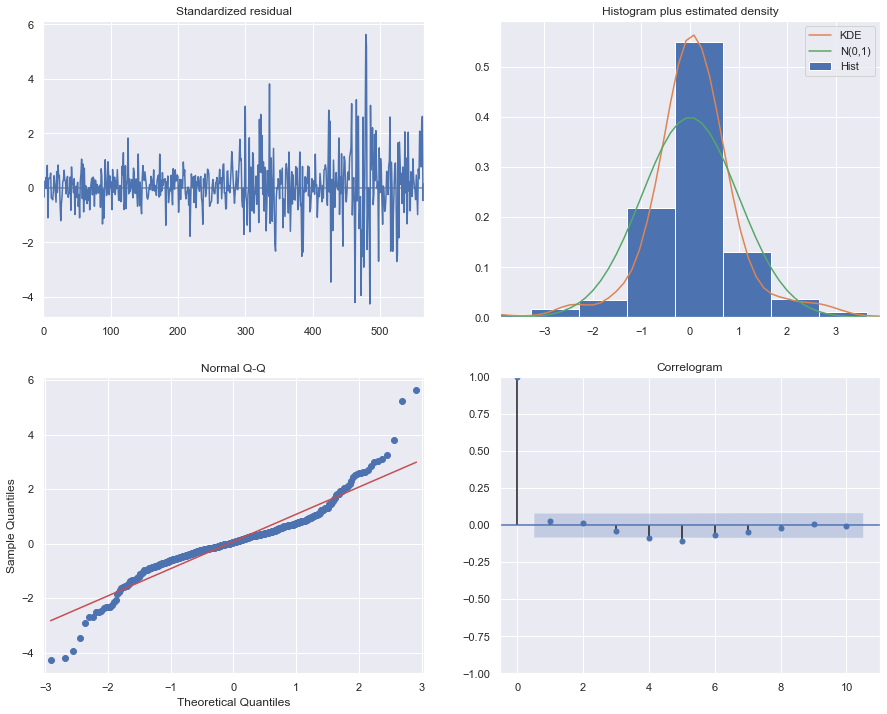

In [16]:
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

Unser Hauptanliegen besteht darin, sicherzustellen, dass die Residuen unseres Modells nicht korreliert und normal verteilt sind mit dem Erwartungswert 0. Wenn das SARIMA-Modell diese Eigenschaften nicht erfüllt, ist dies ein guter Hinweis darauf, dass es weiter verbessert werden kann.

In diesem Fall deutet die Modelldiagnose darauf hin, dass die Residuen nur annähernd normalverteilt sind, da:
* In der oberen rechten Grafik sehen wir, dass die rote KDE-Linie (Kernel Density Estimation) nicht mit der grünen Linie der Standardnormalverteilung übereinstimmt. Trotzdem ist der Verlauf der roten Linie glockenförmig, was ein gutes Zeichen für die Normalverteilung ist.
* In dem Quantil-Quantil-Diagramm (Q-Q-Plot) unten links werden die empirischen Quantile der Beobachtungswerte mit den theoretischen Quantilen der Standardnormalverteilung verglichen. Hier sind einige Ausreißer an den Rändern zu finden, aber die meinsten Punkte liegen etwa auf oder sehr nah an der Geraden. Die Residuen können somit einer beliebigen Normalverteilung folgen.
* Das Korrelogramm der ACF zeigt uns, dass die Residuen eine relativ geringe Korrelation mit sich selbst zu einem früheren Zeitpunkt aufweisen.

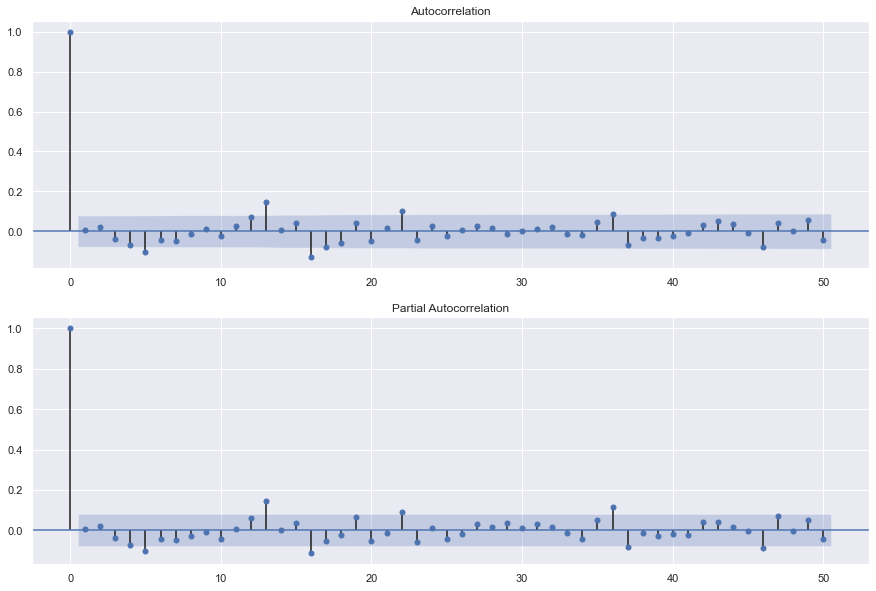

Augmented Dicky-Fuller Test
ADF Test Statistics: -5.805780928533273
p-value: 4.520157279246664e-07
# Lags used: 15
# Observations used: 612
Critical Values:
	1%: -3.4411
	5%: -2.8663
	10%: -2.5693
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


In [17]:
res = best_model.resid
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
fig = sm.graphics.tsa.plot_acf(res, lags = 50, ax = ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags = 50, ax = ax[1])
plt.show()
ADF_Test(res)

Zur Verbesserung der Anpassung können später einige Paramter geändert werden. Zum Beispiel können wir die Rastersuche noch erweitern, da wir eben nur eine begrenzte Anzahl von Parameterkombinationen berücksichtigt haben. Die Erweiterung ist jedoch mit der längeren Laufzeit verbunden.

Mit Hilfe des Modells können nun die Prognosen erstellt werden. Zur Schätzung der Genauigkeit werden wir die vorhergesagten Werte, die unter Verwendung von <b>get_prediction()</b> ausgeben lassen, mit den tatsächlichen Werten der Zeitreihe vergleichen. Das Argument "dynamic = False" stellt sicher, dass wir die Ein-Schritt-Prognosen (one-step-ahead forecasts) erstellen. Dies bedeutet, dass die Prognosen in jedem Zeitpunkt unter Verwendung des vollständigen Verlaufs vom Anfang bis zu diesem Zeitpunkt generiert werden. Da wir auch in die Zukunft prognostizieren, sind diese Prognosen nicht besonders interessant. <b>ARIMA sind also nur für kurzfristige Prognosen (short-term forecasts) nützlich.</b>

In [18]:
# In-sample-Prognose und Out-of-sample-Prognose 
arima_future = best_model.get_prediction(
    start = 0, end = len(train_selling) + 61 - 1,
    dynamic = False
)

# Rückskalierung 
arima_future = minmax.inverse_transform(
    np.expand_dims(arima_future.predicted_mean, axis = 1)
)[:, 0]

In [19]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(
    np.arange(len(train_selling)).reshape((-1, 1)), train_selling
)
linear_future = linear_regression.predict(
    np.arange(len(train_selling) + 61).reshape((-1, 1))
)

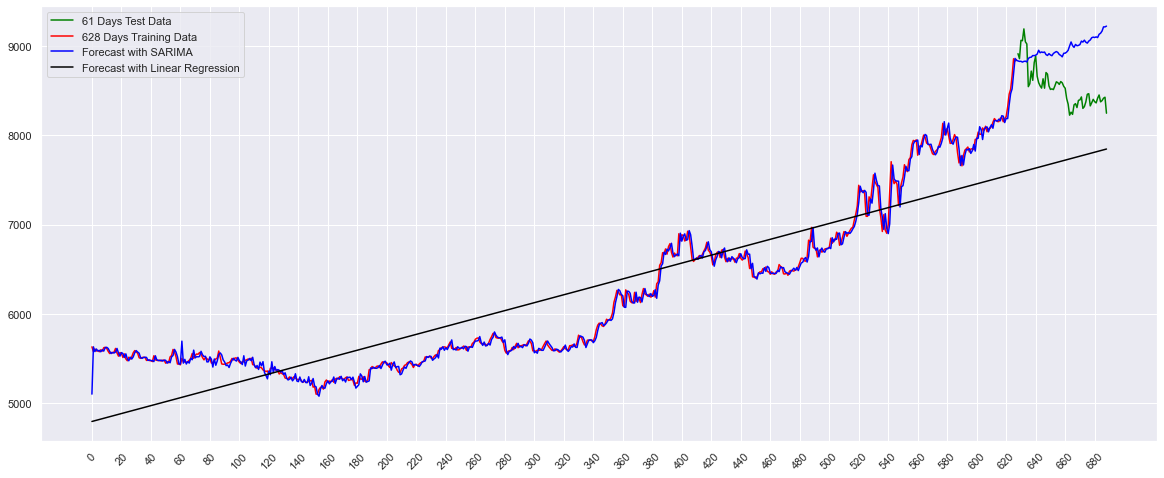

In [20]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(test_selling, label = '61 Days Test Data', color = 'green')
ax.plot(train_selling, label = '628 Days Training Data', color = 'red')
ax.plot(arima_future, label = 'Forecast with SARIMA', color = 'blue')
ax.plot(linear_future, label = 'Forecast with Linear Regression', color = 'black')
plt.xticks(
    np.arange(len(timestamp))[::20],
    np.arange(len(timestamp))[::20],
    rotation = '45',
)
plt.legend(loc = 'best')
plt.show()

     61 Days Test Data  61 Days Predicted Data
628             8911.0             8830.303554
629             8855.0             8824.427351
630             9060.0             8825.821195
631             9056.0             8816.590049
632             9188.0             8824.547526
..                 ...                     ...
684             8372.0             9139.631382
685             8386.0             9163.940949
686             8413.0             9210.743655
687             8424.0             9210.449525
688             8245.0             9219.064884

[61 rows x 2 columns]

MSE = 279691.9650899517


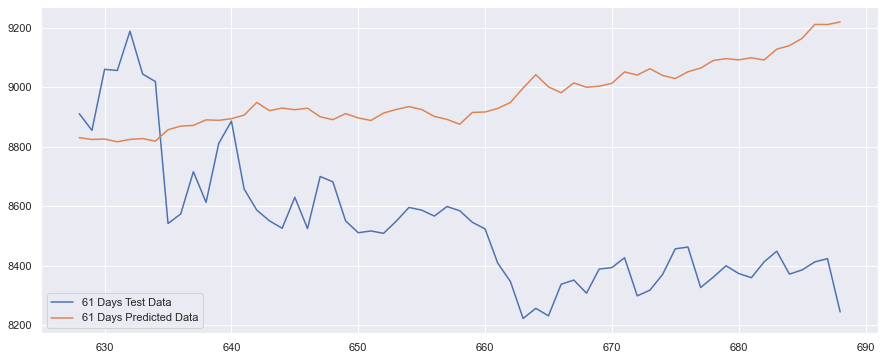

In [21]:
# Out-of-sample-Prognose
pred_61 = arima_future[628: ]

compare = pd.DataFrame({'61 Days Test Data': test_selling, '61 Days Predicted Data': pred_61})
print(compare)
print()
from sklearn.metrics import mean_squared_error
print('MSE = {}'.format(mean_squared_error(test_selling, pred_61)))

compare.plot(figsize = (15, 6))
plt.show()

<b>Bewertungskennzahlen</b>
* <b>Der mittlere quadratische Fehler (MSE)</b> gibt an, wie nah eine Regressionslinie an einer Reihe von Punkten liegt. Dazu werden die Abstände von den Punkten zur Regressionslinie (diese Abstände sind die Fehler) genommen und quadriert. Je näher der Fehler an Null liegt, desto besser ist das Modell.
\begin{align*}
MSE=\frac{1}{n}\sum_{i=1}^n(X_i - \widehat{X_i})^2
\end{align*}
* <b>Der Root Mean Square Error (RMSE)</b> ist eine quadratische Bewertungsregel, die die durchschnittliche Größe des Fehlers misst. Es ist die Quadratwurzel des Durchschnitts der quadratischen Unterschiede zwischen Vorhersage und tatsächlicher Beobachtung. Je näher der Fehler an Null liegt, desto besser ist das Modell.
\begin{align*}
RMSE= \sqrt{MSE}
\end{align*}
* <b>Der mittlere absolute Fehler (MAE)</b> misst auch die durchschnittliche Größe der Fehler in einer Reihe von Vorhersagen, ohne deren Richtung zu berücksichtigen. Je näher der Fehler an Null liegt, desto besser ist das Modell.
\begin{align*}
MAE=\frac{1}{n}\sum_{i=1}^n\left| X_i - \widehat{X_i}\right|
\end{align*}
* <b>Der mittlere absolute prozentuale Fehler (MAPE)</b> ist ein statistisches Maß für die Genauigkeit eines Prognosesystems. Es ist ein Maß in Prozent und wird hauptsächlich für Zeitreihenprognosen verwendet. Je näher der Fehler an Null liegt, desto besser ist das Modell.
\begin{align*}
MAPE=\frac{1}{n}\sum_{i=1}^n\left|\frac{X_i - \widehat{X_i}}{X_i}\right|\cdot 100\%
\end{align*}
* <b>Das Bestimmtheitsmaß</b>, auch Determinationskoeffizient, bezeichnet mit $R^2$, bestimmt den Anteil der Varianz in der abhängigen Variablen, der durch die unabhängige Variable erklärt werden kann. Je näher das Bestimmtheitsmaß am Wert Eins liegt, desto höher ist die "Bestimmtheit" bzw. "Güte" der Anpassung.
* <b>Die Korrelation nach Bravais-Pearson</b> berechnet den linearen Zusammenhang zweier intervallskalierter Variablen. Der Korrelationskoeffizient $r\in[-1;1]$, wobei 1 einen perfekt positiven und -1 eine perfekt negative Korrelation impliziert.
* <b>Der Spearman-Korrelationskoeffizient $r_S$</b> wird auch Rangkorrelationskoeffizient genannt und hat einen entscheidenden Unterschied zum klassischen Pearson-Korrelationskoeffizienten $r$: Die Korrelation wird nicht zwischen den Datenpunkten selbst, sondern zwischen ihren Rängen berechnet.

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_distance(real, predict):
    mse = mean_squared_error(real, predict) # mse = ((real - predict) ** 2).mean()
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(real, predict)
    mape = np.mean(np.abs((real - predict) / real)) * 100
    return {
        'MSE': mse, 
        'RMSE': rmse, 
        'MAE': mae,
        'MAPE': mape
    }

In [23]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr

def calculate_accuracy(real, predict):
    r2 = r2_score(real, predict)
    if r2 < 0:
        r2 = 0

    def change_percentage(val): 
        if val > 0:
            return val
        else:
            return val + 1

    pearson = pearsonr(real, predict)[0]
    spearman = spearmanr(real, predict)[0]
    pearson = change_percentage(pearson)
    spearman = change_percentage(spearman)
    return {
        'R-Squared': r2 * 100,
        'Pearson': pearson * 100,
        'Spearman': spearman * 100
    }

<b>Validierung basierend auf den Trainingsdaten</b>

In [24]:
arima_cut = arima_future[: len(train_selling)]

In [25]:
calculate_distance(train_selling, arima_cut)

{'MSE': 4412.8108103522445,
 'RMSE': 66.42899073711902,
 'MAE': 43.35859286107954,
 'MAPE': 0.6806515175247856}

In [26]:
calculate_accuracy(train_selling, arima_cut)

{'R-Squared': 99.45348310486908,
 'Pearson': 99.72788538946465,
 'Spearman': 99.1052432568142}

<b>Validierung basierend auf den Testdaten</b>

In [27]:
arima_cut = arima_future[len(train_selling) :]

In [28]:
calculate_distance(test_selling, arima_cut)

{'MSE': 279691.9650899517,
 'RMSE': 528.859116485621,
 'MAE': 474.3545065214003,
 'MAPE': 5.616924623508078}

In [29]:
calculate_accuracy(test_selling, arima_cut)

{'R-Squared': 0, 'Pearson': 25.80711643023108, 'Spearman': 19.1110170311823}

# Literatur

[1] https://github.com/OleBo/Prediction-Models-Finance/blob/master/misc/kijang-emas-bank-negara.ipynb

[2] https://www.statsmodels.org/stable/_modules/statsmodels/tsa/statespace/sarimax.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

[4] https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

[5] <b>Vogel, Jürgen</b>, 2015, Prognose von Zeitreihen, Springer Gabler. 